# Problem Statement: Create a Machine Learning model using various Classification Models to predict rainfall.


1. Your views about the problem statement?

The problem statement involves predicting rainfall using machine learning models. It is a binary classification problem where the goal is to predict whether it will rain tomorrow based on various meteorological features. It's a practical application with real-world significance, and the goal is to compare different models for accuracy. 

2. What will be your approach to solving this task?

My approach would be to:

Load and preprocess the data.  
Perform data cleaning and handle missing values.  
Use a decision tree classifier to establish a baseline.  
Implement ensemble methods like Random Forest and other classification models.    
Compare the accuracy of each model.  
Evaluate performance using a confusion matrix.  
Select the best-performing model and analyze why it outperformed others.    

3. What were the available ML model options you had to perform this task?

The available ML model options for this task include:

Decision Tree Classifier: A simple and interpretable model often used for baseline predictions.

Random Forest Classifier: An ensemble method combining multiple decision trees to enhance accuracy.

Gradient Boosting Classifier: Another ensemble method building trees sequentially to correct errors of the previous ones.

These models were chosen for their effectiveness in classification tasks and their suitability for predicting rainfall based on historical weather data.   






Some additional ML model options are also there, such as - 

Logistic Regression: Often used in binary classification tasks.

Support Vector Machine (SVM): Effective for binary and multiclass classification.

K-Nearest Neighbors (KNN): Utilizes proximity of data points for classification.

Naive Bayes Classifier: Assumes independence between features for classification.

Neural Network: Deep learning model for complex relationships in data.

In [1]:
# Importing libraries
import pandas as pd                   # For working with data frames
import numpy as np                    # For numerical operations

In [2]:
# Loading data into dataframe
df = pd.read_excel('sydney_rain prediction.xlsx', header=0)

In [3]:
# Let's see how the data looks
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


There are 3337 ro 17 columns. Below are the explanation of the columns-

Date: The day the weather information was recorded.  
Location: The place where the weather station is situated.  
MinTemp: The lowest temperature during the day.  
MaxTemp: The highest temperature during the day.  
Rainfall: How much it rained in millimeters on that day.  
Evaporation: How much water evaporated in the 24 hours until 9 am.  
Sunshine: The number of hours the sun was shining brightly.  
Humidity 9am: Humidity level at 9 am in the morning.  
Humidity 3pm: Humidity level at 3 pm in the afternoon.  
Pressure 9am: Air pressure at sea level at 9 am.  
Pressure 3pm: Air pressure at sea level at 3 pm.  
Cloud 9 am: How much of the sky is covered by clouds at 9 am.  
Cloud 3 pm: How much of the sky is covered by clouds at 3 pm.  
Temp 9 am: Temperature at 9 am in the morning.  
Temp 3 pm: Temperature at 3 pm in the afternoon.  
RainToday: Whether it rained today (1 for yes, 0 for no).  
RainTomorrow: Whether it will rain tomorrow (1 for yes, 0 for no).  


The Target Variable that we need to predict is "RainTomorrow"


# Data Preprocessing

In [4]:
# Checking some samples
df.sample(8)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
770,2010-03-12,Sydney,18.7,24.5,0.2,9.0,7.9,55.0,54.0,1035.0,1034.8,2.0,4.0,23.3,22.5,No,No
1557,2012-06-09,Sydney,6.6,18.3,0.0,2.0,9.5,78.0,44.0,1026.7,1024.0,NaN,NaN,8.3,17.6,No,Yes
3258,2017-04-08,Sydney,14.9,24.9,0.0,5.0,9.8,68.0,49.0,1026.2,1021.4,4.0,4.0,18.4,23.1,No,No
440,2009-04-16,Sydney,14.9,24.1,0.0,10.0,9.8,43.0,38.0,1015.2,1011.7,0.0,1.0,17.4,22.6,No,No
2233,2014-06-14,Sydney,11.8,19.9,5.0,2.4,3.9,89.0,53.0,1012.1,1009.2,8.0,2.0,14.3,19.2,Yes,No
520,2009-07-05,Sydney,10.1,18.1,0.0,3.0,9.8,54.0,32.0,1016.4,1016.4,2.0,1.0,11.8,17.2,No,No
3158,2016-12-29,Sydney,22.6,36.6,0.0,10.4,4.8,49.0,30.0,1007.2,1004.4,7.0,6.0,28.1,31.8,No,No
3044,2016-09-06,Sydney,10.0,20.5,0.0,5.0,10.8,66.0,58.0,1030.4,1026.3,0.0,0.0,15.0,20.2,No,No


In [5]:
 df['Location'].unique()

array(['Sydney'], dtype=object)

The "Location" column has only one value for all data points, it doesn't provide any useful information for the model, so I am removing it.

In [6]:
df = df.drop('Location', axis=1)

Including the date adds a temporal dimension to the model, making it more complex. Let's keep the model simple and interpretable. So, removing date column also.

In [7]:
df = df.drop('Date', axis=1)

In [8]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [9]:
# Data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


All columns are numerical except RainToday and RainTomorrow. We will later covert them into numbers 0 and 1.
There are missing values in the columns. Let's see the count of missing values

In [10]:
# No. of missing values
df.isnull().sum()

MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [11]:
# Filling numerical columns
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(0, inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

# Filling categorical columns
df['Cloud9am'].fillna(df['Cloud9am'].mode()[0], inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

In [12]:
# Checking the changes
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [13]:
# Let's check for duplicate values
df.duplicated().sum()

0

There are no duplicate values

In [14]:
# Let's look how the data look mathematically
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.324243,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,3.641894,4.686245,17.819742,21.533333
std,4.551593,4.493290,9.887277,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.775528,2.624507,4.894240,4.301156
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,1.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,3.000000,6.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


# Feature engineering

Merging columns which is giving same kind of information into one. This helps in reducing dimensionality and providing a more comprehensive overview of each feature.

In [15]:
# Taking mean of columns of same type
df['Humidity'] = (df.Humidity9am+df.Humidity3pm)/2
df['Pressure'] = (df.Pressure9am+df.Pressure3pm)/2
df['Cloud'] = (df.Cloud9am+df.Cloud3pm)/2
df['Temp'] = (df.Temp9am+df.Temp3pm)/2

In [16]:
# Drop the original columns
df = df.drop(['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1)

In [17]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Humidity,Pressure,Cloud,Temp
0,19.5,22.4,15.6,6.200000,0.0,Yes,Yes,88.0,1017.50,8.0,20.80
1,19.5,25.6,6.0,3.400000,2.7,Yes,Yes,78.0,1017.15,7.0,23.60
2,21.6,24.5,6.6,2.400000,0.1,Yes,Yes,87.0,1016.15,7.5,23.25
3,20.2,22.8,18.8,2.200000,0.0,Yes,Yes,86.5,1013.00,8.0,21.15
4,19.7,25.7,77.4,5.187432,0.0,Yes,Yes,81.0,1006.55,8.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,No,No,62.5,1025.60,2.0,14.20
3333,9.3,19.2,0.0,2.000000,9.2,No,No,65.5,1026.55,2.0,14.85
3334,9.4,17.7,0.0,2.400000,2.7,No,No,70.5,1017.90,6.0,13.75
3335,10.1,19.3,0.0,1.400000,9.3,No,No,45.5,1016.20,3.5,15.70


In [18]:
# Correlations among columns
correlation_matrix = df.corr()
correlation_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity,Pressure,Cloud,Temp
MinTemp,1.000000,0.770701,0.012758,0.567623,-0.062959,0.182140,-0.378135,0.221736,0.890452
MaxTemp,0.770701,1.000000,-0.140220,0.509060,0.325107,-0.185496,-0.410688,-0.104342,0.947567
Rainfall,0.012758,-0.140220,1.000000,-0.100703,-0.306593,0.346773,-0.016898,0.245680,-0.101690
Evaporation,0.567623,0.509060,-0.100703,1.000000,0.174467,-0.266144,-0.326214,-0.042087,0.568649
Sunshine,-0.062959,0.325107,-0.306593,0.174467,1.000000,-0.590462,-0.071083,-0.742439,0.231841
Humidity,0.182140,-0.185496,0.346773,-0.266144,-0.590462,1.000000,0.234312,0.513214,-0.102875
Pressure,-0.378135,-0.410688,-0.016898,-0.326214,-0.071083,0.234312,1.000000,-0.008225,-0.413743
Cloud,0.221736,-0.104342,0.245680,-0.042087,-0.742439,0.513214,-0.008225,1.000000,-0.016207
Temp,0.890452,0.947567,-0.101690,0.568649,0.231841,-0.102875,-0.413743,-0.016207,1.000000


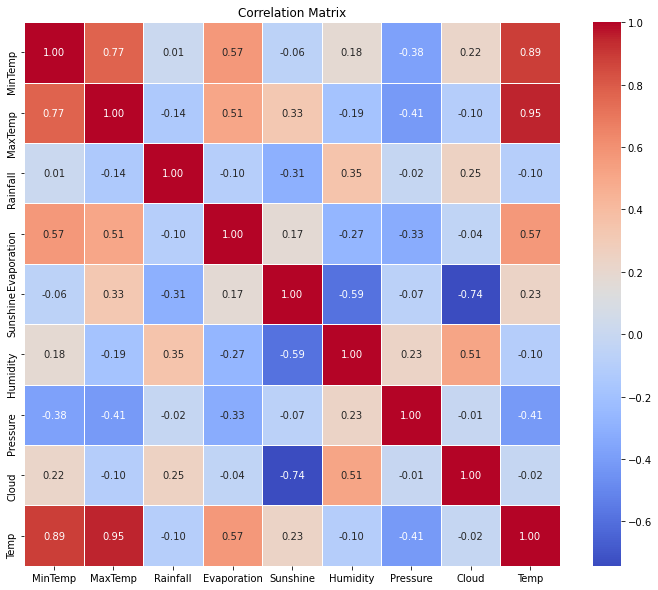

In [19]:
# Data visualization
import matplotlib.pyplot as plt       # For basic plotting
import seaborn as sns                 # For advanced data visualization

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

We can see that both MinTemp and MaxTemp are highly related to the column Temp. Highly correlated columns may introduce multicollinearity issues, which can impact the interpretability and stability of the model. So, Temp column should be removed

In [20]:
df=df.drop('Temp', axis=1)

In [21]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Humidity,Pressure,Cloud
0,19.5,22.4,15.6,6.200000,0.0,Yes,Yes,88.0,1017.50,8.0
1,19.5,25.6,6.0,3.400000,2.7,Yes,Yes,78.0,1017.15,7.0
2,21.6,24.5,6.6,2.400000,0.1,Yes,Yes,87.0,1016.15,7.5
3,20.2,22.8,18.8,2.200000,0.0,Yes,Yes,86.5,1013.00,8.0
4,19.7,25.7,77.4,5.187432,0.0,Yes,Yes,81.0,1006.55,8.0
...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,No,No,62.5,1025.60,2.0
3333,9.3,19.2,0.0,2.000000,9.2,No,No,65.5,1026.55,2.0
3334,9.4,17.7,0.0,2.400000,2.7,No,No,70.5,1017.90,6.0
3335,10.1,19.3,0.0,1.400000,9.3,No,No,45.5,1016.20,3.5


C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='MinTemp'>

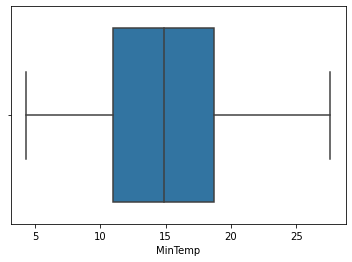

In [22]:
# Checking for outliers
sns.boxplot(df['MinTemp'])

C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='MaxTemp'>

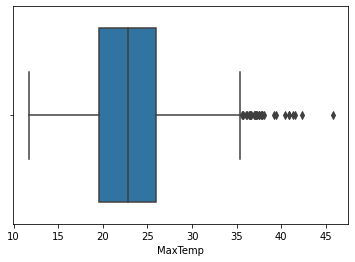

In [23]:
sns.boxplot(df['MaxTemp'])

I think this is not outliers as temp can take those high values

#  Handling Categorical Variables

In [24]:
# Convert categorical variables in the dataset (RainToday and RainTomorrow) 
# in to numerical form using dummy variables (pd.get_dummies()).

df = pd.get_dummies(df, columns=['RainToday','RainTomorrow'], drop_first=True, dtype=int)

In [25]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity,Pressure,Cloud,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,88.0,1017.50,8.0,1,1
1,19.5,25.6,6.0,3.400000,2.7,78.0,1017.15,7.0,1,1
2,21.6,24.5,6.6,2.400000,0.1,87.0,1016.15,7.5,1,1
3,20.2,22.8,18.8,2.200000,0.0,86.5,1013.00,8.0,1,1
4,19.7,25.7,77.4,5.187432,0.0,81.0,1006.55,8.0,1,1
...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,62.5,1025.60,2.0,0,0
3333,9.3,19.2,0.0,2.000000,9.2,65.5,1026.55,2.0,0,0
3334,9.4,17.7,0.0,2.400000,2.7,70.5,1017.90,6.0,0,0
3335,10.1,19.3,0.0,1.400000,9.3,45.5,1016.20,3.5,0,0


# X-y split

In [26]:
# Our dataset is ready for splitting now
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

In [27]:
X=df.drop('RainTomorrow_Yes',axis=1)

In [28]:
y=df['RainTomorrow_Yes']

In [29]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity,Pressure,Cloud,RainToday_Yes
0,19.5,22.4,15.6,6.200000,0.0,88.0,1017.50,8.0,1
1,19.5,25.6,6.0,3.400000,2.7,78.0,1017.15,7.0,1
2,21.6,24.5,6.6,2.400000,0.1,87.0,1016.15,7.5,1
3,20.2,22.8,18.8,2.200000,0.0,86.5,1013.00,8.0,1
4,19.7,25.7,77.4,5.187432,0.0,81.0,1006.55,8.0,1
...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,62.5,1025.60,2.0,0
3333,9.3,19.2,0.0,2.000000,9.2,65.5,1026.55,2.0,0
3334,9.4,17.7,0.0,2.400000,2.7,70.5,1017.90,6.0,0
3335,10.1,19.3,0.0,1.400000,9.3,45.5,1016.20,3.5,0


In [30]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3332    0
3333    0
3334    0
3335    0
3336    0
Name: RainTomorrow_Yes, Length: 3337, dtype: int32

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models

# Decision Tree Classifier:

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print results
print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

Decision Tree Accuracy: 0.7365269461077845
Confusion Matrix for Decision Tree:
[[389  95]
 [ 81 103]]


# Random Forest Classifier:

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Random Forest Accuracy: 0.8173652694610778
Confusion Matrix for Random Forest:
[[444  40]
 [ 82 102]]


# Gradient Boosting Classifier:

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting:")
print(conf_matrix_gb)

Gradient Boosting Accuracy: 0.8098802395209581
Confusion Matrix for Gradient Boosting:
[[443  41]
 [ 86  98]]


# Analysing Performance

In [35]:
print("Decision Tree Accuracy:", accuracy_dt)
print("Random Forest Accuracy:", accuracy_rf)
print("Gradient Boosting Accuracy:", accuracy_gb)

Decision Tree Accuracy: 0.7365269461077845
Random Forest Accuracy: 0.8173652694610778
Gradient Boosting Accuracy: 0.8098802395209581


4. Which model’s performance is best and what could be the possible reason for that?

The Random Forest model performed the best with an accuracy of 81.74%. This is because Random Forest is good at handling complex patterns, non-linear relationships in data, and is robust to overfitting. It also provides feature importance, helping capture the most relevant factors for rainfall prediction.

5. What steps can you take to improve this selected model’s performance even further?

Feature Engineering: Create new meaningful features or transform existing ones for better model understanding.

Hyperparameter Tuning: Optimize parameters like the number of trees, tree depth, and learning rate for Random Forest to enhance performance.

Ensemble Techniques: Combine multiple well-performing models to improve accuracy further.

Handling Imbalance: If there's a class imbalance, apply techniques like oversampling, undersampling, or using class weights to balance the dataset.

Additional Data: Incorporate more relevant data to increase the model's understanding and predictive capabilities.